In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [312]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import my_functions as myf
import sklearn

define audiofile

In [313]:
filename='./prueba30seg.wav'

Handle audio file

In [314]:
fs, audio_i = wavfile.read(filename)
audio=audio_i[:,0]
time=np.arange(len(audio))* 1/float(fs)
nsamp=len(audio)

In [317]:
print('sampling frequency: {}Hz'.format(fs))
print('total time: {}s'.format(time[-1]))
print('audio shape:{}'.format(audio.shape))

sampling frequency: 44100Hz
total time: 29.99997732426304s
audio shape:(1323000,)


In [329]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [336]:
n_points = 200
audio_rs = audio[::n_points]
n_max = int(np.floor(len(audio)/n_points))
autocors = []
for i in range(0,len(audio),n_points):
    autocors.append(autocorr(audio[i:i+n_points]))
autocors = np.array(autocors)    
print(autocors.shape)

(6615, 200)


<IPython.core.display.Javascript object>


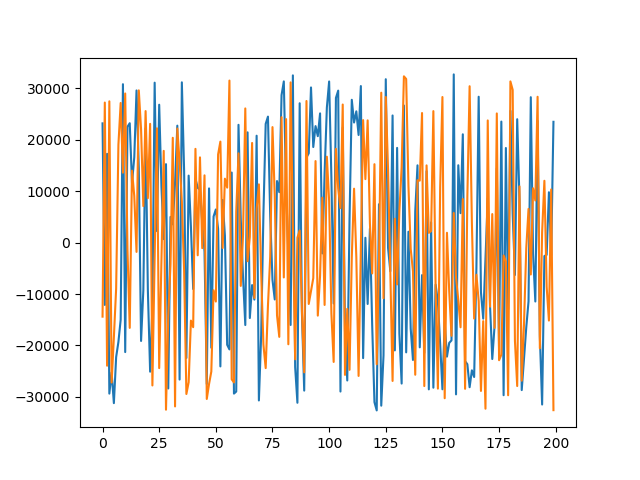

In [341]:
plt.figure()
plt.plot(autocorr(autocors[3350]))
plt.plot(autocorr(autocors[4000]))

<IPython.core.display.Javascript object>


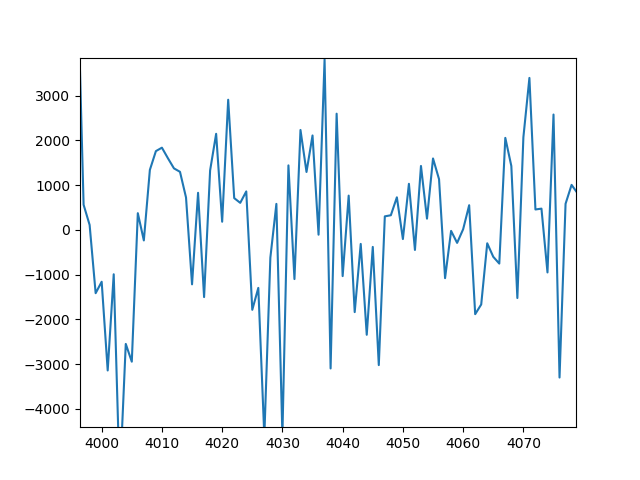

In [337]:
plt.figure()
plt.plot(audio_rs)

In [284]:
spectrum_fourier=myf.stft(audio, fftsize=512)
n1=spectrum_size=np.size(s1,0)
amplitude=np.mean(np.real(s1*np.conjugate(s1)),1)
t1=np.arange(n1)/float(n1)*time[-1]
samp2=len(audio)/float(len(t1))
a1=np.interp(t1, time, audio)

In [285]:
spectrum_fourier.shape

(10332, 257)

<IPython.core.display.Javascript object>


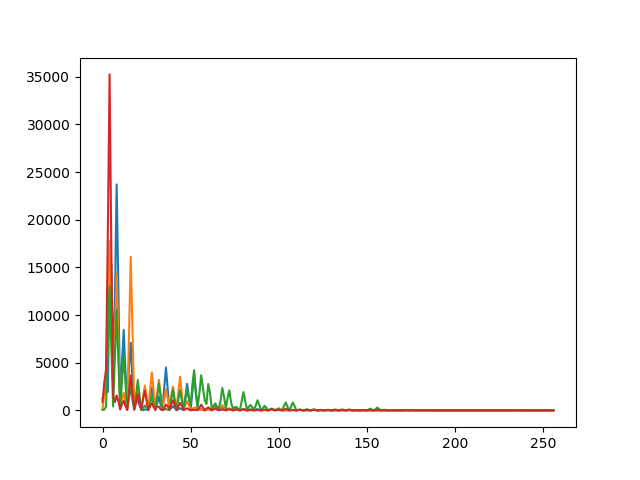

In [293]:
plt.figure()
i=600; plt.plot(np.abs(np.mean(spectrum_fourier[i:i+100,:],axis=0)))
i=1200; plt.plot(np.abs(np.mean(spectrum_fourier[i:i+100,:],axis=0)))
i=1600; plt.plot(np.abs(np.mean(spectrum_fourier[i:i+100,:],axis=0)))
i=7400; plt.plot(np.abs(np.mean(spectrum_fourier[i:i+100,:],axis=0)))
#plt.plot(spectrum_fourier[1600,:])
#plt.plot(spectrum_fourier[1200,:])

<IPython.core.display.Javascript object>


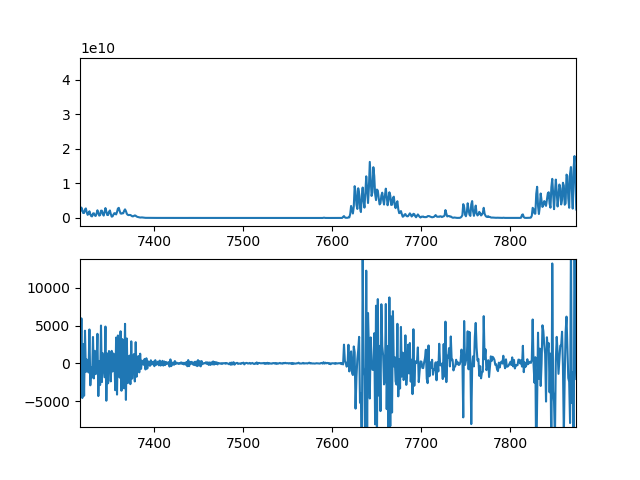

In [291]:
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(amplitude)
plt.subplot(2,1,2, sharex=ax1)
plt.plot(a1)

downsampling for easy handling

In [197]:
rs_rate = 100
audio_1c_rs = audio_i[::rs_rate,0]
fs_rs = fs/100

In [248]:
s1=myf.stft(audio_i[:,0], fftsize=400)
n1=np.size(s1,0)
amp=np.mean(np.real(s1*np.conjugate(s1)),1)

In [249]:
print(audio_1c_rs.shape)
print(amp.shape)

(13230,)
(13226,)


(13230,)


<IPython.core.display.Javascript object>


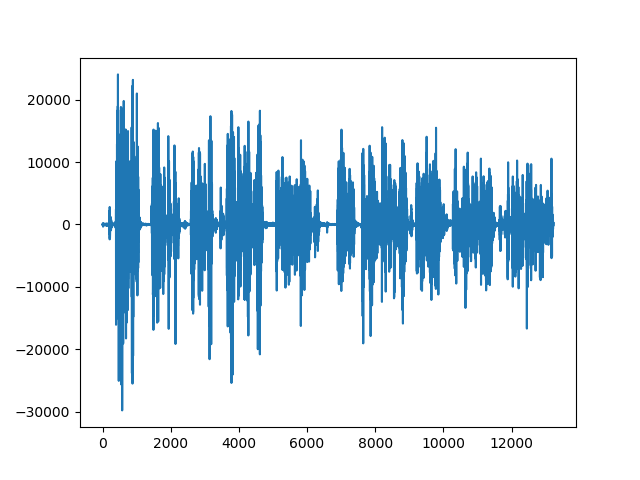

In [200]:
print(audio_1c_rs.shape)
plt.figure(); plt.plot(audio_1c_rs)

now we sample in intervals intervals of `n_points` samples


In [211]:
n_points = 20
samp_every = int(np.floor(len(audio_1c_rs)/(n_points)))
samples = np.array([audio_1c_rs[n_points*i:(n_points)*(i+1)] for i in range(samp_every)])

In [221]:
samples.shape

(661, 20)

In [229]:
fano = [np.var(np.abs(x))/np.mean(np.abs(x)) for x in samples]
var = [np.var(x) for x in samples]

In [ ]:
amp=np.mean(np.real(s1*np.conjugate(s1)),1)

<IPython.core.display.Javascript object>


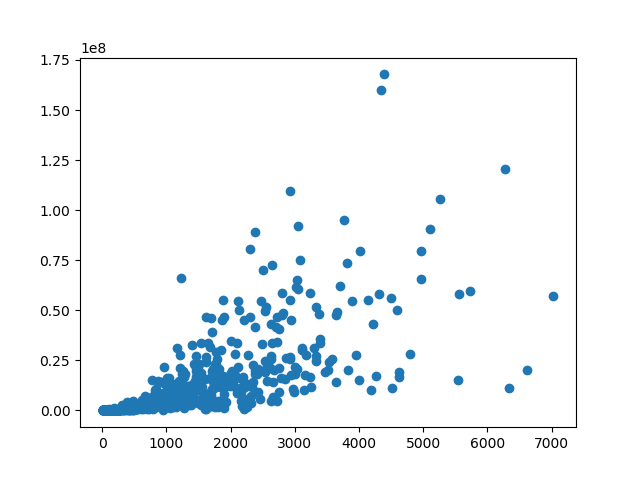

In [231]:
plt.figure()
plt.plot(fano, var,'o')

<IPython.core.display.Javascript object>


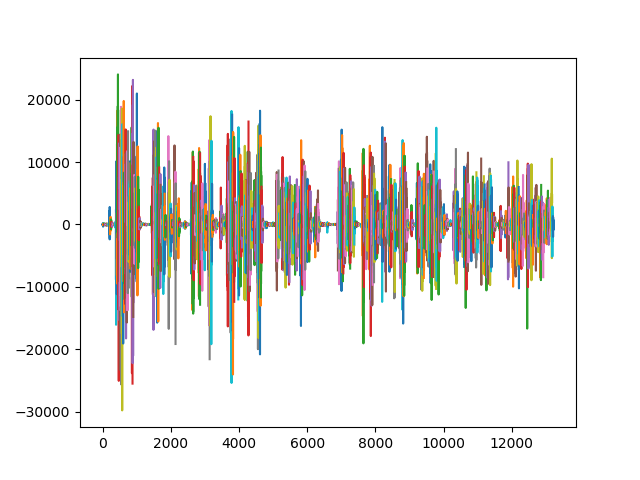

In [220]:
plt.figure()
for i in range(samp_every):
    plt.plot(np.arange(n_points)+i*n_points, samples[i])

TSNE of one of the samples

In [215]:
from sklearn.manifold import TSNE

In [216]:
tsne= TSNE(n_components=2)

In [217]:
signal_transformed = tsne.fit_transform(samples)

In [222]:
signal_transformed.shape

(661, 2)

<IPython.core.display.Javascript object>


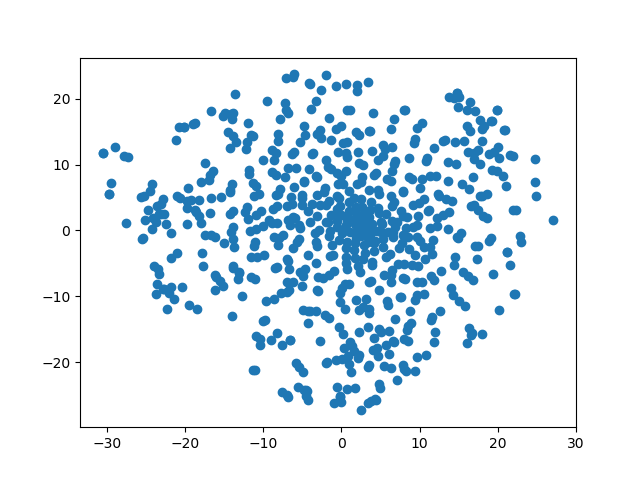

In [218]:
plt.figure()
plt.plot(signal_transformed[:,0],signal_transformed[:,1],'o' )

In [88]:
s1=myf.stft(audio, fftsize=256)
n1=np.size(s1,0)
amp=np.mean(np.real(s1*np.conjugate(s1)),1)
t1=np.arange(n1)/float(n1)*time[-1]
samp2=len(audio)/float(len(t1))
a1=np.interp(t1, time, audio)

<IPython.core.display.Javascript object>


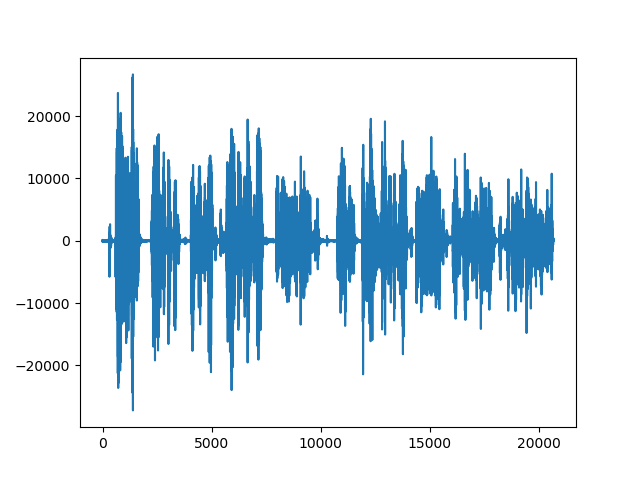

In [89]:
plt.figure()
plt.plot(a1)

In [90]:
amp_tresh=np.median(amp/5.)
short_sil=4
filt1=(amp>amp_tresh)

tf1=t1[filt1]
af1=a1[filt1]



nsil=0
sil=[]
tsil=[]
completando=0
for i in range(len(t1)):
    if completando==0 and amp[i]>amp_tresh:
        completando=1
        sil.append([])
        tsil.append([])
        sil[-1].append(a1[i])
        tsil[-1].append(t1[i])        
    elif completando ==1 and amp[i]>amp_tresh:
        sil[-1].append(a1[i])
        tsil[-1].append(t1[i])        
    elif completando ==1 and amp[i]<amp_tresh:
        completando=0


        
sil=[x  for x in sil if len(x)>short_sil]
tsil=[x  for x in tsil if len(x)>short_sil]
num_sil=len(sil)
norm_factor=np.max(np.abs(a1))
sil=[x/norm_factor  for x in sil]
 
#%% 




<IPython.core.display.Javascript object>


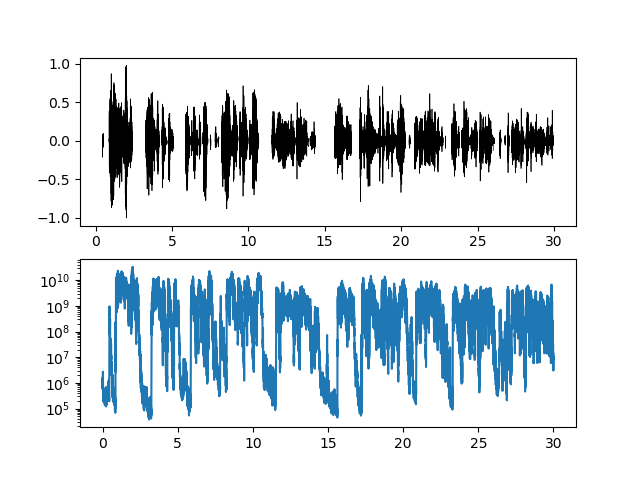

In [91]:
plt.figure()
axs=plt.subplot(2,1,1)
#plt.plot(t1, a1, color='blue')
for i in range(len(sil)):
    plt.plot(tsil[i], sil[i], linewidth=0.5, color='black')
plt.plot()
axa=plt.subplot(2,1,2)
plt.plot(t1,amp)
axa.set_yscale('log')


#%%


In [96]:
total_time = tsil[-1][-1]

In [ ]:
number of lines = 5


num lines: 1.0


<IPython.core.display.Javascript object>


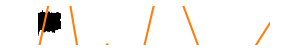

0.0
0.06666666666666667
0.06666666666666667
0.1
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.16666666666666666
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.23333333333333334
0.26666666666666666
0.26666666666666666
0.26666666666666666
0.3
0.3
0.3
0.3
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.36666666666666664
0.36666666666666664
0.4
0.4
0.4
0.43333333333333335
0.43333333333333335
0.43333333333333335
0.43333333333333335
0.43333333333333335
0.43333333333333335
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.4666666666666667
0.533333

/Users/ivanlengyel/coding_projects/testing3/lib/python3.6/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


In [93]:
tlim=30
num_lines=np.ceil(tsil[-1][-1]/float(tlim))
print('num lines: {}'.format(num_lines))
carta=plt.figure(figsize=(3,num_lines/float(2)))

scolor='black'
slw=0.5

num_line=2
line_factor=2
for i in range(num_sil):
    num_line=int(tsil[i][-1]) / int(tlim)
    plt.plot(np.array(tsil[i])-(num_line*tlim), sil[i]-num_line*line_factor, color=scolor, linewidth=slw)    

plt.tight_layout()
plt.xlim(0,10)
plt.ylim(2, -num_lines-2)
plt.axis('off')
plt.savefig('./test.pdf')
plt.savefig('./test.jpg')